# Cubic Interpolation

## Fundamental cubic interpolation

If the values of a function $f(x)$ and its derivate are known at $x=0$ and $x=1$, then, the function can be interpolated on the interval $[0,1]$ using a third-degree polynomial.

A third degree polynomial and its derivative:
$$ f(x) = ax^3 + bx^2 + cx + d $$
$$ f'(x) = 3ax^2 + 2bx + c $$

The values of the polynomial and its derivative at $x=0$ and $x=1$:

$$ f(0) = d $$
$$ f(1) = a + b + c + d $$

$$ f'(0) = c $$
$$ f'(1) = 3a + 2b + c $$

The four equations above can be rewritten to this:

$$ a = 3f(0) - 2f(1) + f'(0) + f'(1) $$
$$ b = -3f(0) + 3f(1) - 2f'(0) - f'(0) $$
$$ c = f'(0) $$
$$ d = f(0) $$

And there, we have our cubic interpolation formula.

Interpolation is often used to interpolate between a list of values. In that case we don't know the derivative of the function. We could simply use derivative $0$ at every point, but we obtain smoother curves when we use the slope of a line between the previous and the next point as the derivative at a point. In that case the resulting polynomial is called a Catmull-Rom spline. Suppose you have the values $p_0$, $p_1$, $p_2$ and $p_3$ at respectively $x=-1$, $x=0$, $x=1$, and $x=2$. Then we can assign the values of $f(0)$, $f(1)$, $f'(0)$ and $f'(1)$ using the formulas below to interpolate between $p_1$ and $p_2$:


$$ f(0) = p_1 $$
$$ f(1) = p_2 $$

$$ f'(0) = \frac{p_2-p_0}{2} $$
$$ f'(1) = \frac{p_3-p_1}{2} $$

Combining the last four formulas and the preceding four, we get:

$$ a = - \frac{1}{2}p_0 + \frac{3}{2}p_1 - \frac{3}{2}p_2 + \frac{1}{2}p_3 $$
$$ b = p_0 - \frac{5}{2}p_1 + 2p_2 - \frac{1}{2}p_3 $$
$$ c = -\frac{1}{2}p_0 + \frac{1}{2}p_2 $$
$$ d = p_1 $$

So our cubic interpolation formula becomes:

$$ f(p_0,p_1,p_2,p_3,x) = (-\frac{1}{2}p_0+\frac{3}{2}p_1-\frac{3}{2}p_2+\frac{1}{2}p_3)x^3 + (p_0-\frac{5}{2}p_1+2p_2-\frac{1}{2}p_3)x^2 + (-\frac{1}{2}p_0+\frac{1}{2}p_2)x + p_1 $$

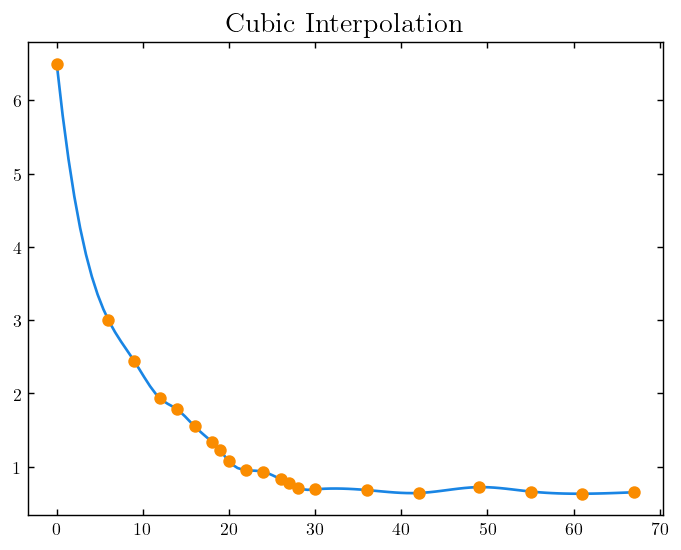

In [2]:
#### Cubic Interpolation

import numpy as np
import matplotlib; import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x, y = np.loadtxt('Data/Cubic.dat', unpack=True)
t = np.linspace(0.01, 67, 100)

f = interp1d(x, y, kind='cubic')
u = f(t)


plt.figure(dpi=128); params = {"text.usetex":True, "font.family":"serif", "mathtext.fontset":"cm", "axes.titlesize": 16, "axes.labelsize":14, "figure.facecolor":"w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)

plt.title("Cubic Interpolation")
plt.plot(t, u,      c="#0078E1", alpha=0.9)
plt.plot(x, y, "o", c="#FA8C00", alpha=1.0)
plt.tick_params(direction='in')
plt.show()